In [1]:
%run Functions.ipynb

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.tsa.stattools as TSA
import statsmodels.api as sm

plt.style.use(["seaborn-dark-palette", "seaborn-whitegrid"])

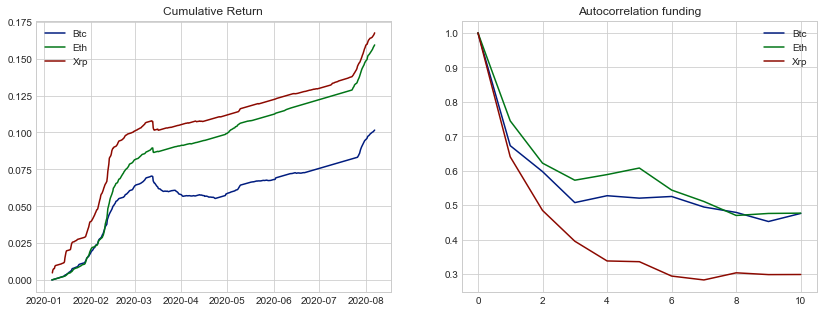

In [6]:
dfs = [df_xbt_binance, df_eth_binance, df_xrp_binance]
names = ["Btc","Eth","Xrp"]
start = "2020-01-06" # When Ripple was launched

fig, axs = plt.subplots(1, 2, figsize=(14,5))
for i in range(len(dfs)):
    df,name = dfs[i], names[i]
    df = df[df.index>start]
    df = df.loc[df.index.hour.isin([0,8,16]) & (df.index.minute==0)]
    df["cumulative"] = cumulative_return(df["fundingRate"])
    axs[0].plot(df.index,df["cumulative"], label=name)
    axs[0].set_title("Cumulative Return")
    axs[0].legend()
     
    autocorr = TSA.acf(np.asarray(df["fundingRate"]),nlags=10)
    axs[1].plot(autocorr, label=name)
    axs[1].set_title("Autocorrelation funding")
    axs[1].legend()

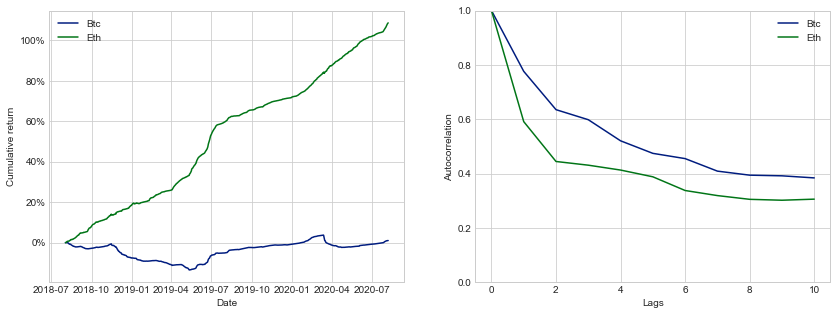

In [7]:
import matplotlib.ticker as mtick
dfs = [df_xbt_bitmex, df_eth_bitmex]
names = ["Btc","Eth"]
start = "2018-08-02" # When ethereum futures launched
fig, axs = plt.subplots(1, 2, figsize=(14,5))

for i in range(len(dfs)):
    df,name = dfs[i], names[i]
    df = df[df.index>start]
    df = df.loc[df.index.hour.isin([4,12,20]) & (df.index.minute==0)]
    df["cumulative"] = cumulative_return(df["fundingRate"])
    axs[0].plot(df.index,df["cumulative"]*100, label=name)
    axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[0].set_ylabel("Cumulative return")
    axs[0].set_xlabel("Date")
    axs[0].legend()
     
    autocorr = TSA.acf(np.asarray(df["fundingRate"]),nlags=10)
    axs[1].plot(autocorr, label=name)
    axs[1].set_ylabel("Autocorrelation")
    axs[1].set_xlabel("Lags")
    axs[1].legend()
    plt.ylim(0,1)

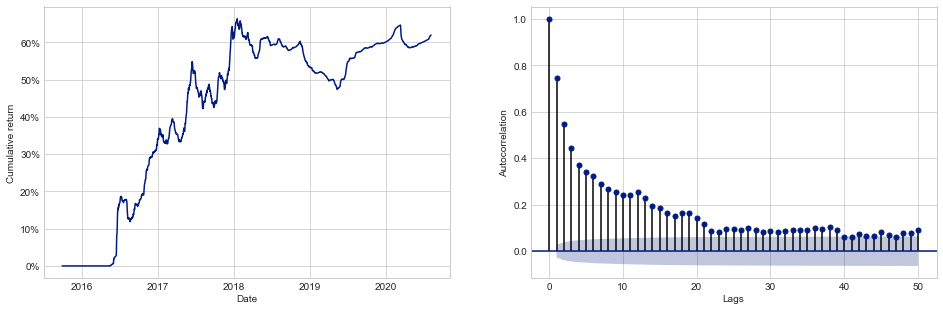

In [8]:
dfs = [df_xbt_bitmex]
names = ["Btc"]
start = "2015-08-02" # When ethereum futures launched
fig, axs = plt.subplots(1, 2, figsize=(16,5))

for i in range(len(dfs)):
    df,name = dfs[i], names[i]
    df = df[df.index>start]
    df = df.loc[df.index.hour.isin([4,12,20]) & (df.index.minute==0)]
    df["cumulative"] = cumulative_return(df["fundingRate"])
    axs[0].plot(df.index,df["cumulative"]*100, label=name)
    axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[0].set_ylabel("Cumulative return")
    axs[0].set_xlabel("Date")
     
    #autocorr = TSA.acf(np.asarray(df["fundingRate"]),nlags=10)
    sm.graphics.tsa.plot_acf(np.asarray(df["fundingRate"]), lags=50, ax=axs[1], title="")
    axs[1].set_ylabel("Autocorrelation")
    axs[1].set_xlabel("Lags")

(-3, 40)

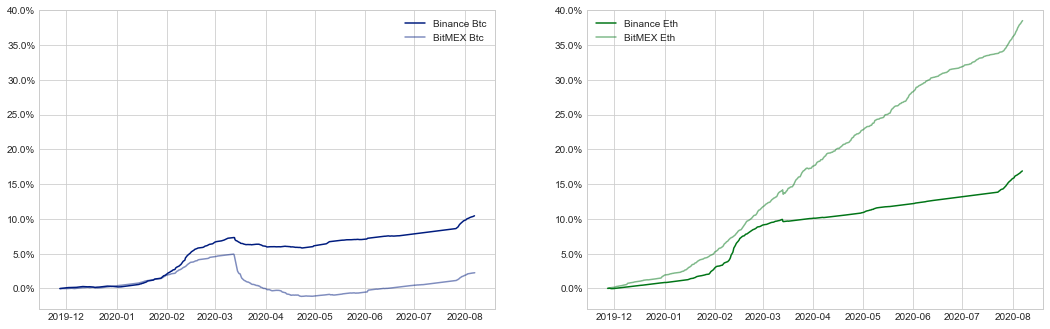

In [9]:
# Bitcoin comparison
start   = "2019-11-27" # When Ripple was launched
bitmex  = df_xbt_bitmex
binance = df_xbt_binance

fig, axs = plt.subplots(1, 2, figsize=(18,5.5))
binance = binance[binance.index>start]
binance = binance.loc[binance.index.hour.isin([0,8,16]) & (binance.index.minute==0)]
binance["cumulative"] = cumulative_return(binance["fundingRate"])
axs[0].plot(binance.index,binance["cumulative"]*100, label="Binance Btc")
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].legend()

bitmex = bitmex[bitmex.index>start]
bitmex = bitmex.loc[bitmex.index.hour.isin([4,12,20]) & (bitmex.index.minute==0)]
bitmex["cumulative"] = cumulative_return(bitmex["fundingRate"])
axs[0].plot(bitmex.index,bitmex["cumulative"]*100, label="BitMEX Btc", color= "#001C7F", alpha=0.5)
axs[0].set_ylim(-3,40)
axs[0].legend()

# Ethereum comparison

bitmex  = df_eth_bitmex
binance = df_eth_binance
start = "2019-11-27" #When Eth was launched

binance = binance[binance.index>start]
binance = binance.loc[binance.index.hour.isin([0,8,16]) & (binance.index.minute==0)]
binance["cumulative"] = cumulative_return(binance["fundingRate"])
axs[1].plot(binance.index,binance["cumulative"]*100, label="Binance Eth", color="#017517")
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[1].legend()

bitmex = bitmex[bitmex.index>start]
bitmex = bitmex.loc[bitmex.index.hour.isin([4,12,20]) & (bitmex.index.minute==0)]
bitmex["cumulative"] = cumulative_return(bitmex["fundingRate"])
axs[1].plot(bitmex.index,bitmex["cumulative"]*100, label="BitMEX Eth", color="#017517", alpha=0.5)
axs[1].legend()
axs[1].set_ylim(-3,40)


In [10]:
def stat_funding(df, start="2010-07-01", end = "2021", asset="XBTUSD", exchanger="binance"):
    df = df[df.index>start]
    df = df[df.index<end]
    # print("estimated #funding:", 3* len(df)/(60*24) )
    if exchanger == "bitmex": df = df.loc[df.index.hour.isin([4,12,20]) & (df.index.minute==0)]
    if exchanger == "binance": df = df.loc[df.index.hour.isin([0,8,16]) & (df.index.minute==0)]
    
    time_start = df.index.min()
    time_end   = df.index.max()
    n_observ  = len(df)
    average  = Print_percent(df["fundingRate"].mean())
    stdv     = Print_percent(df["fundingRate"].std())
    yearly   = Print_percent(df["fundingRate"].mean() * 365 * 3)
    positive = Print_percent((df["fundingRate"]>0).sum() / len(df))
    big_05   = Print_percent((df["fundingRate"]>0.05/100).sum() / len(df))
    big_20   = Print_percent((df["fundingRate"]>0.2/100).sum() / len(df))
    quantile_05 = Print_percent(np.quantile(df["fundingRate"],0.05))
    quantile_95 = Print_percent(np.quantile(df["fundingRate"],0.95))
    MIN      = Print_percent(df["fundingRate"].min())
    MAX      = Print_percent(df["fundingRate"].max())
    equal01  = Print_percent((df["fundingRate"]==0.01/100).sum() / len(df))
    equal00  = Print_percent((df["fundingRate"]==0).sum() / len(df))
    
    res = [time_start, time_end,n_observ, average, stdv, yearly, positive, big_05, big_20, equal01, equal00,quantile_05, quantile_95, MIN, MAX]
    res = pd.DataFrame(res, index=["time_start","time_end","observations","avg","std","yearly","positive","big_05","big_20","equal01","equal00","quantile05","quantile95","min","max"], columns=[asset])
    return(res)  

In [11]:
# Longer history, BTc
stat_funding(df_xbt_bitmex, exchanger="bitmex")

,XBTUSD
time_start,2015-09-25 20:00:00
time_end,2020-08-06 20:00:00
observations,5309
avg,0.012 %
std,0.11 %
yearly,12.777 %
positive,58.071 %
big_05,15.389 %
big_20,4.841 %
equal01,26.709 %


In [12]:
# Longer history, BTC and ETH
a = stat_funding(df_xbt_bitmex, start="2018-08-02 09:07:00", exchanger="bitmex")
a.insert(1,"ETHUSD",stat_funding(df_eth_bitmex, start="2018-08-02 09:07:00", exchanger="bitmex"))

a

,XBTUSD,ETHUSD
time_start,2018-08-02 12:00:00,2018-08-02 12:00:00
time_end,2020-08-06 20:00:00,2020-08-06 20:00:00
observations,2207,2207
avg,0.0 %,0.049 %
std,0.045 %,0.06 %
yearly,0.528 %,53.93 %
positive,69.914 %,96.511 %
big_05,5.211 %,38.061 %
big_20,0.272 %,1.994 %
equal01,48.391 %,33.122 %


In [13]:
# Since start of binance
a = stat_funding(df_xbt_bitmex, start="2020-02-05", exchanger="bitmex")
a.insert(1,"ETHUSD",stat_funding(df_eth_bitmex,start="2020-02-05", exchanger="bitmex"))
a.insert(2,"XRPUSD",stat_funding(df_xrp_bitmex,start="2020-02-05", exchanger="bitmex"))
a.insert(3,"XBTUSD_binance",stat_funding(df_xbt_binance,start="2020-02-05", exchanger="binance"))
a.insert(4,"ETHUSD_binance",stat_funding(df_eth_binance,start="2020-02-05", exchanger="binance"))
a.insert(5,"XRPUSD_binance",stat_funding(df_xrp_binance,start="2020-02-05", exchanger="binance"))
a

,XBTUSD,ETHUSD,XRPUSD,XBTUSD_binance,ETHUSD_binance,XRPUSD_binance
time_start,2020-02-05 04:00:00,2020-02-05 04:00:00,2020-02-05 12:00:00,2020-02-05 08:00:00,2020-02-05 08:00:00,2020-02-05 08:00:00
time_end,2020-08-06 20:00:00,2020-08-06 20:00:00,2020-08-06 20:00:00,2020-08-06 16:00:00,2020-08-06 16:00:00,2020-08-06 16:00:00
observations,552,552,551,551,551,551
avg,0.0 %,0.059 %,0.039 %,0.014 %,0.025 %,0.022 %
std,0.051 %,0.058 %,0.067 %,0.033 %,0.039 %,0.046 %
yearly,0.2 %,64.671 %,42.358 %,15.412 %,26.957 %,23.815 %
positive,76.449 %,98.732 %,99.093 %,80.944 %,97.459 %,95.1 %
big_05,5.254 %,49.819 %,30.853 %,9.8 %,15.064 %,12.523 %
big_20,0.0 %,0.906 %,1.089 %,0.181 %,0.544 %,1.089 %
equal01,57.246 %,21.92 %,43.739 %,46.279 %,63.884 %,65.336 %


In [14]:
#Using prices!!! (good only for the gruber plot)
pd.set_option('display.max_columns', 100)
def Corr_return(df, min_shift, subset="all"): #Subset = "all","positive","negative"
    
    sin = df.copy()
    
    for MIN in min_shift:                  
        sin[-MIN] = sin["close"].shift(MIN) # -1 in the column means 1 minute before
        
    if subset=="all":     sin = sin[abs(sin["fundingRate"])>0]
    if subset=="positive":sin = sin[sin["fundingRate"]>0]
    if subset=="negative":sin = sin[sin["fundingRate"]<0]
        
    sin     =  sin.iloc[:, ::-1] #This will reverse the ordering of the columns! First the candles before the funding
    funding =  sin["fundingRate"]
    sin     =  sin.iloc[:,:len(min_shift)] # Delete non useful candles
    sin     = sin.div(sin[0], axis=0) -1
    sin["fundingRate"] = funding
    #print( sin.head())
    
    corr= []
    for i in range(len(sin.columns)-1):
        corr.append(np.corrcoef(sin.iloc[:,i], sin["fundingRate"])[0][1])
        
    return sin,corr

In [15]:
df_xbt_bitmex2018 = df_xbt_bitmex[df_xbt_bitmex.index > "2018-08"]

sin,corr = Corr_return(df_xbt_bitmex2018, range(-10,10), subset="negative")
sin = sin.iloc[:,:-1]

my_df = sin.describe()
cols = np.asarray(my_df.columns)
mean = 100*my_df.loc["mean",]
down = 100*(my_df.loc["mean",] - my_df.loc["std",] )
up = 100*(my_df.loc["mean",] + my_df.loc["std",] )

df = pd.DataFrame({"mean":mean, "down":down, "up":up}, index=cols)
df=df .apply(pd.to_numeric, errors='ignore')

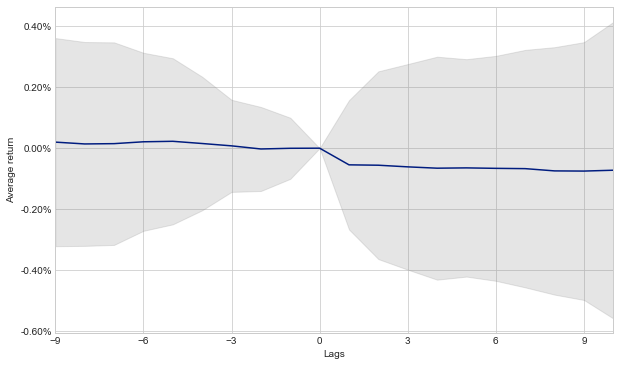

In [16]:
plt.figure(figsize=(10,6))
ax = df["mean"].plot()
plt.fill_between(df.index,df.down, df.up, color="grey", alpha=0.2)
plt.xticks([-9,-6,-3,0,3,6,9])
plt.xlabel("Lags")
plt.ylabel("Average return")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [17]:
pd.set_option('display.max_columns', 100)
def Corr_return(df, min_shift, subset="all"): #Subset = "all","positive","negative"
    
    sin = df.copy()
    
    for MIN in min_shift:                  
        sin[-MIN] = sin["log_ret"].shift(MIN) # -1 in the column means 1 minute before
        
    if subset=="all":     sin = sin[abs(sin["fundingRate"])>0]
    if subset=="positive":sin = sin[sin["fundingRate"]>0]
    if subset=="negative":sin = sin[sin["fundingRate"]<0]
        
    sin     =  sin.iloc[:, ::-1] #This will reverse the ordering of the columns! First the candles before the funding
    funding =  sin["fundingRate"]
    sin     =  sin.iloc[:,:len(min_shift)] # Delete non useful candles
    sin["fundingRate"] = funding
    
    corr= []
    for i in range(len(sin.columns)-1):
        corr.append(np.corrcoef(sin.iloc[:,i], sin["fundingRate"])[0][1])
    
    cum   = sin[[1]]    
    for i in range(2,len(sin.columns)):
        if i in sin.columns:
            cum[i] = np.array(cum[[i-1]]) + np.array(sin[[i]])
    
    cum[0]   = sin[[0]]    
    for i in range(1,len(sin.columns)):
        if -i in sin.columns:
            cum[-i] = np.array(cum[[-i+1]]) + np.array(sin[[-i]])
        
    return sin,cum,corr

-0.04068855421686751


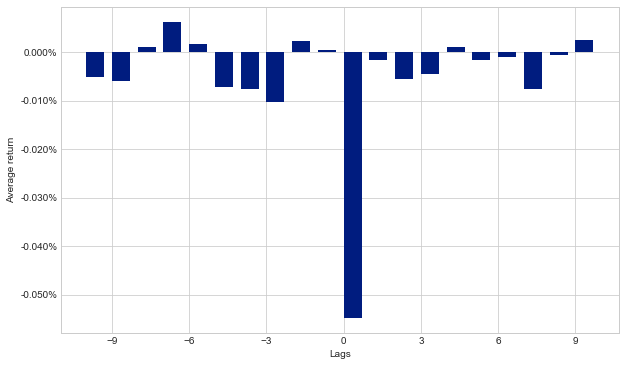

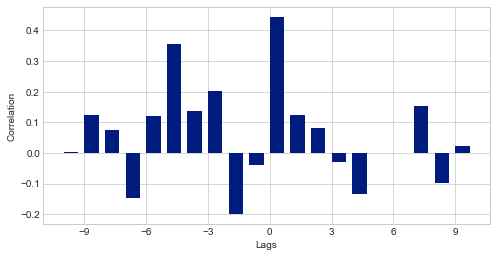

-------------------------------------------------------


In [21]:
dfs = [df_xbt_bitmex2018]
names = ["Xbt Bitmex"]
my_range = range(-10,10)

for i in range(len(dfs)):
    df,name = dfs[i], names[i]
    sin,cum,corr = Corr_return(df, my_range, subset="negative")
    cum = cum.reindex(sorted(cum.columns), axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(my_range,sin.iloc[:,:len(my_range)].describe().loc["mean",]*100, align="edge",width=0.7)
    #plt.vlines(0,0, sin["fundingRate"].describe().loc["mean"]*100, linestyle="dashed") #sin["fundingRate"].describe().loc["mean"]
    print(sin["fundingRate"].describe().loc["mean"]*100)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks([-9,-6,-3,0,3,6,9])
    plt.ylabel("Average return")
    plt.xlabel("Lags")
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.bar(my_range,corr, align="edge", width=0.7)
    plt.xticks([-9,-6,-3,0,3,6,9])
    plt.ylabel("Correlation")
    plt.xlabel("Lags")
    plt.show()
    
    print("-------------------------------------------------------")

In [32]:
len(pd.DataFrame(df_xbt_bitmex2018["fundingRate"][abs(df_xbt_bitmex2018.fundingRate)>0]))

2211

In [36]:
df_eth_bitmex.index.min()

Timestamp('2018-08-02 09:07:00')